# Two parallel noncomunicating zones in a reservoir
I'm injecting the seawater into a reservoir via a long horizontal well. The injectivity is better in some areas. I assign a larger injection rate to the 1D model for that zone, and a lower injection rate to the rest of the well, which is modelled again with a 1D model.

In [1]:
include("../FractionalFlow/FractionalFlow.jl")
using PyPlot, Dierckx, SetPyPlot
FF = FractionalFlow
setrcparam()

┌ Info: Recompiling stale cache file /home/ali/.julia/compiled/v1.1/SetPyPlot/Rkvls.ji for SetPyPlot [d6c70c59-9b85-50b1-926c-19fb5cf24e7d]
└ @ Base loading.jl:1184
┌ Warning: Package SetPyPlot does not have PyPlot in its dependencies:
│ - If you have SetPyPlot checked out for development and have
│   added PyPlot as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with SetPyPlot
└ Loading PyPlot into SetPyPlot from project dependency, future warnings for SetPyPlot are suppressed.


In [2]:
krw0_ww = 0.271636
krw0_ow = 0.226423
kro0_ww = 0.640774
kro0_ow = 0.53222
nw_ww = 3.74488
# nw_ow= 3.81109
# no_ww = 1.93454
nw_ow= 3.0
no_ww = 2.0
no_ow= 2.0844
sor_ww=0.333829
sor_ow=0.40325
sor_mw=0.1
swc_ww=0.212
swc_ow=0.212

u_inj_fast = 0.3e-5
u_inj_slow = 1.0e-5 
pv_inj_fast = 2.0
pv_inj_slow = u_inj_slow/u_inj_fast*pv_inj_fast
A_fast = 0.7 # normalized to a total injection area of 1.0
A_slow = 1-A_fast # normalized to a total injection area of 1.0
eq_const = 0.3

0.3

In [3]:
pv_inj_slow

6.666666666666667

┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401
┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401


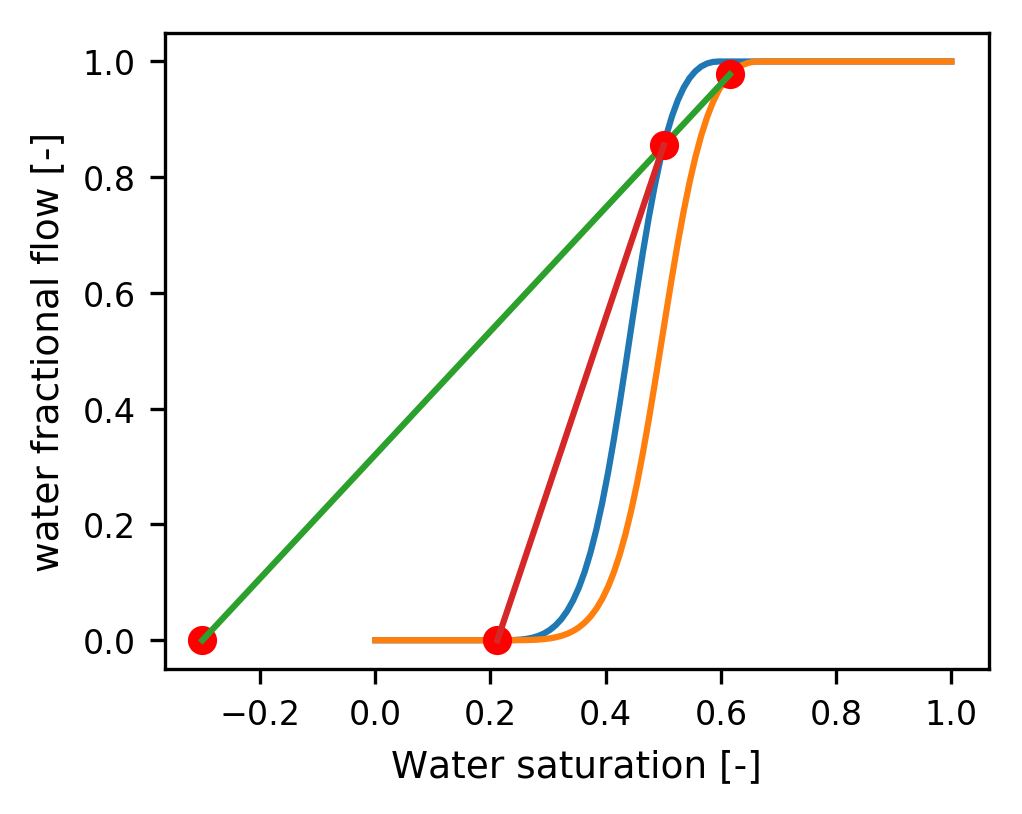

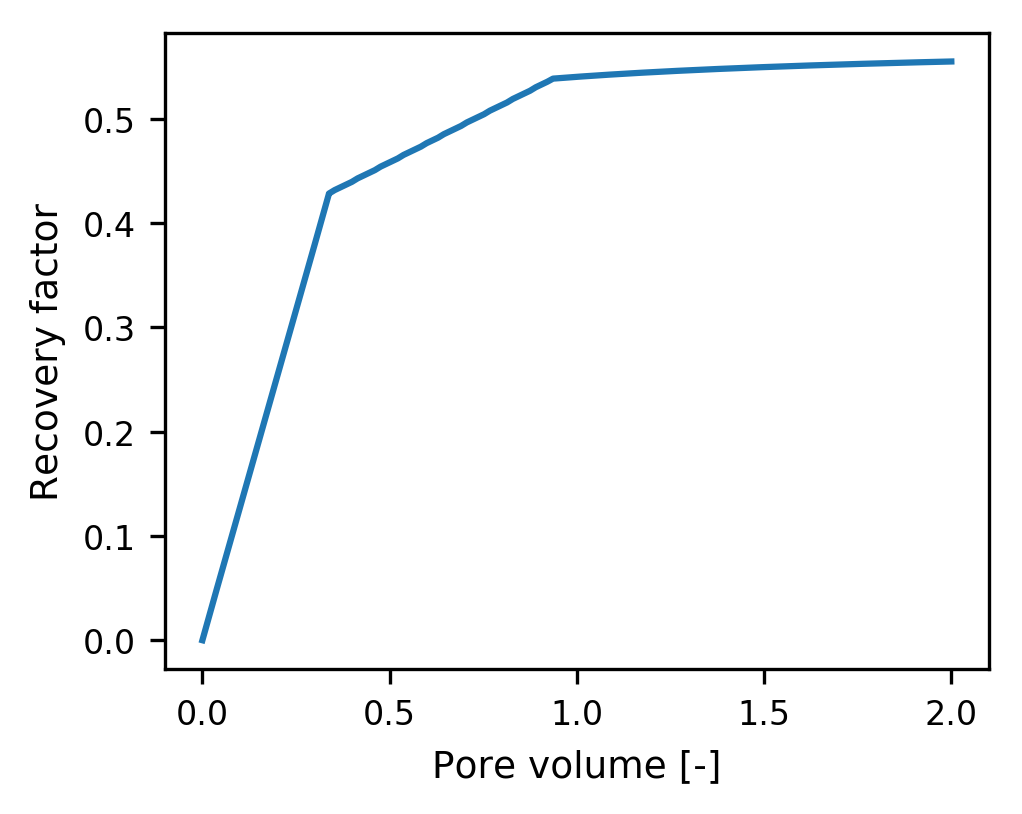

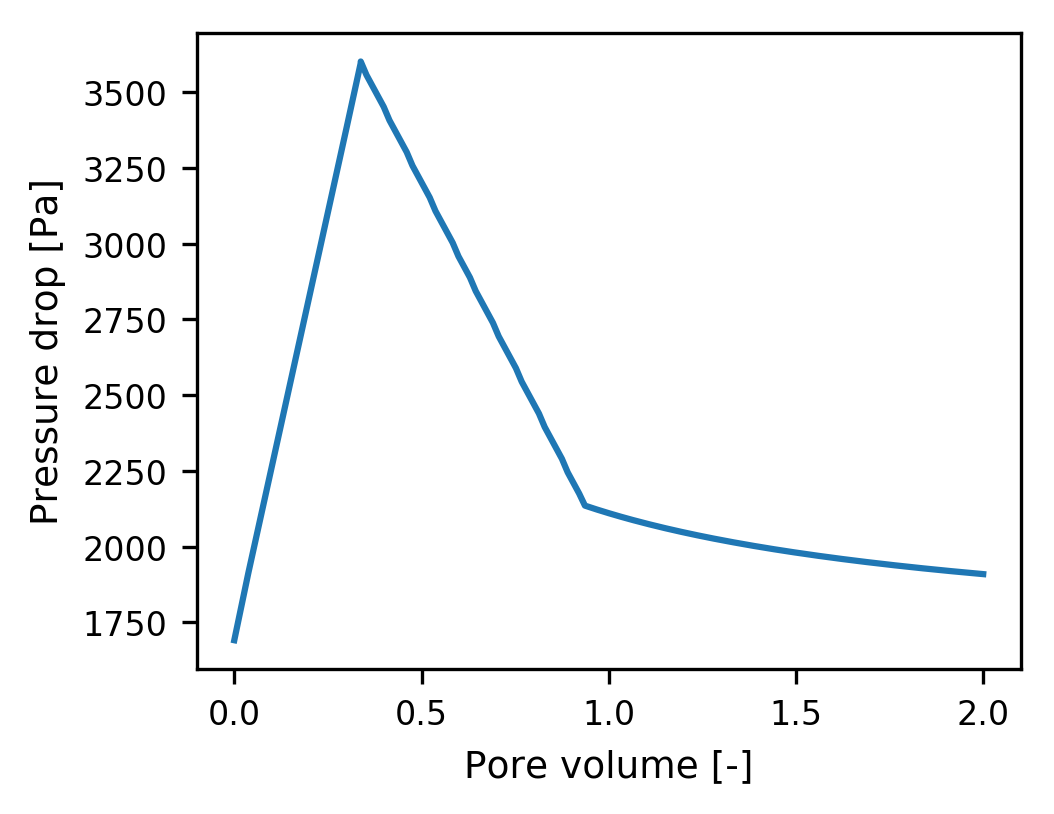

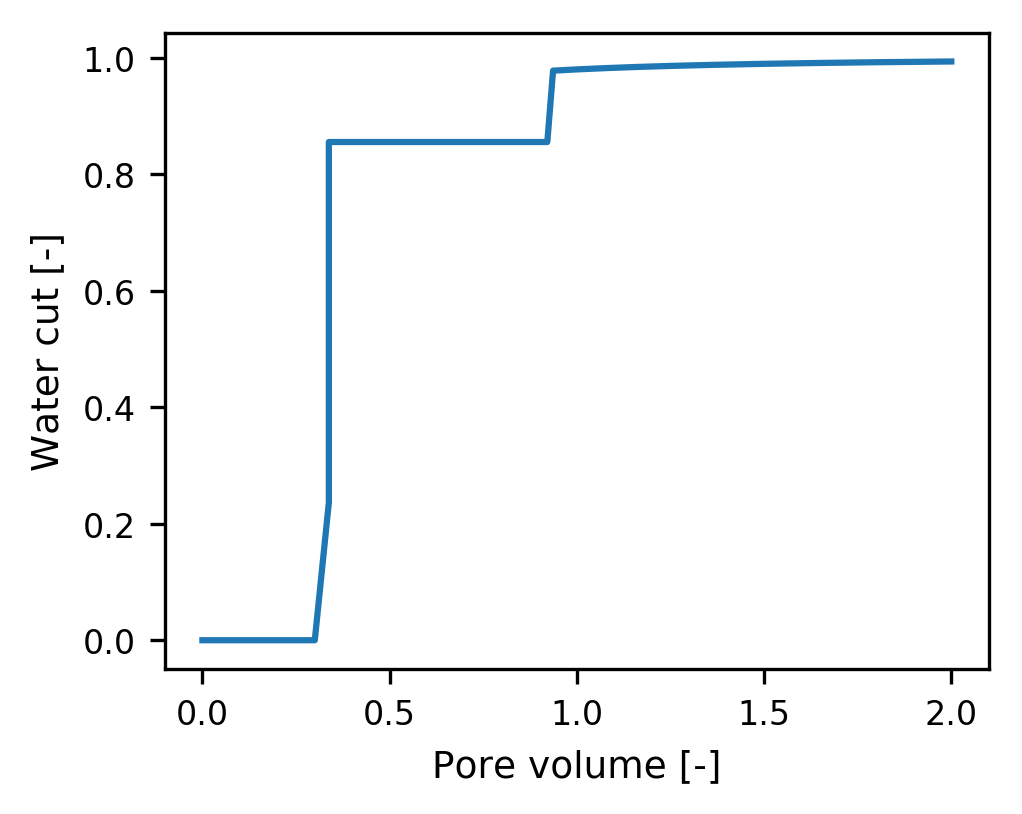

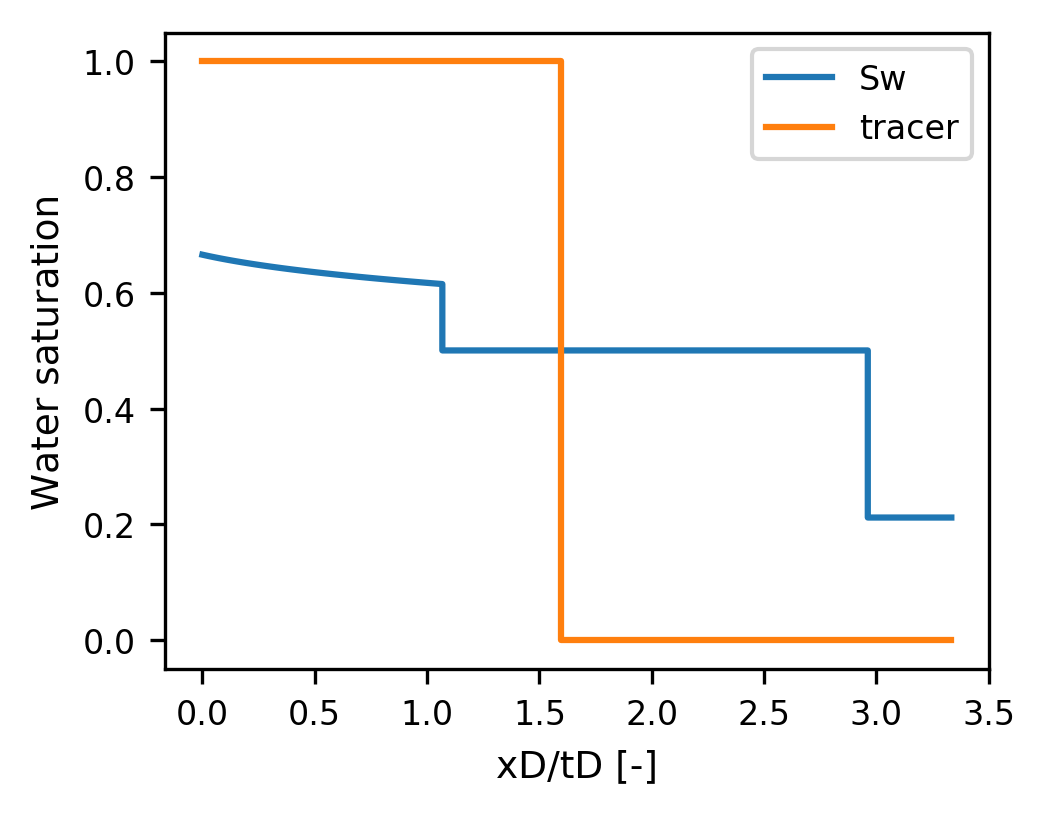

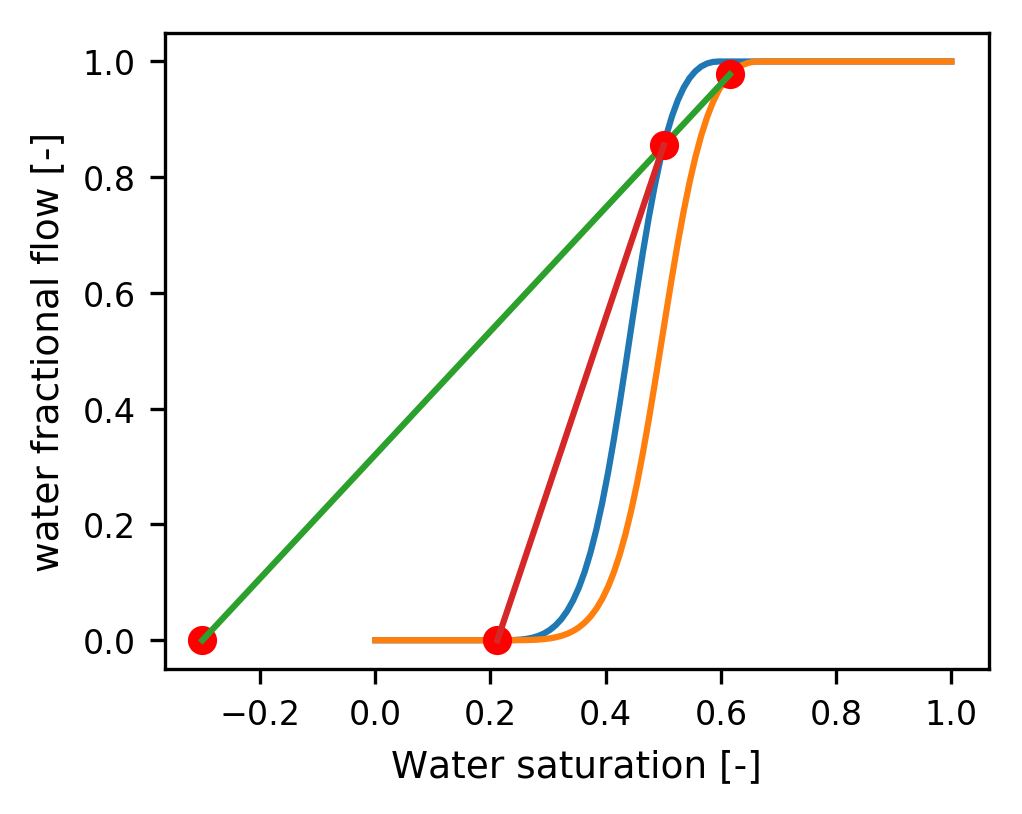

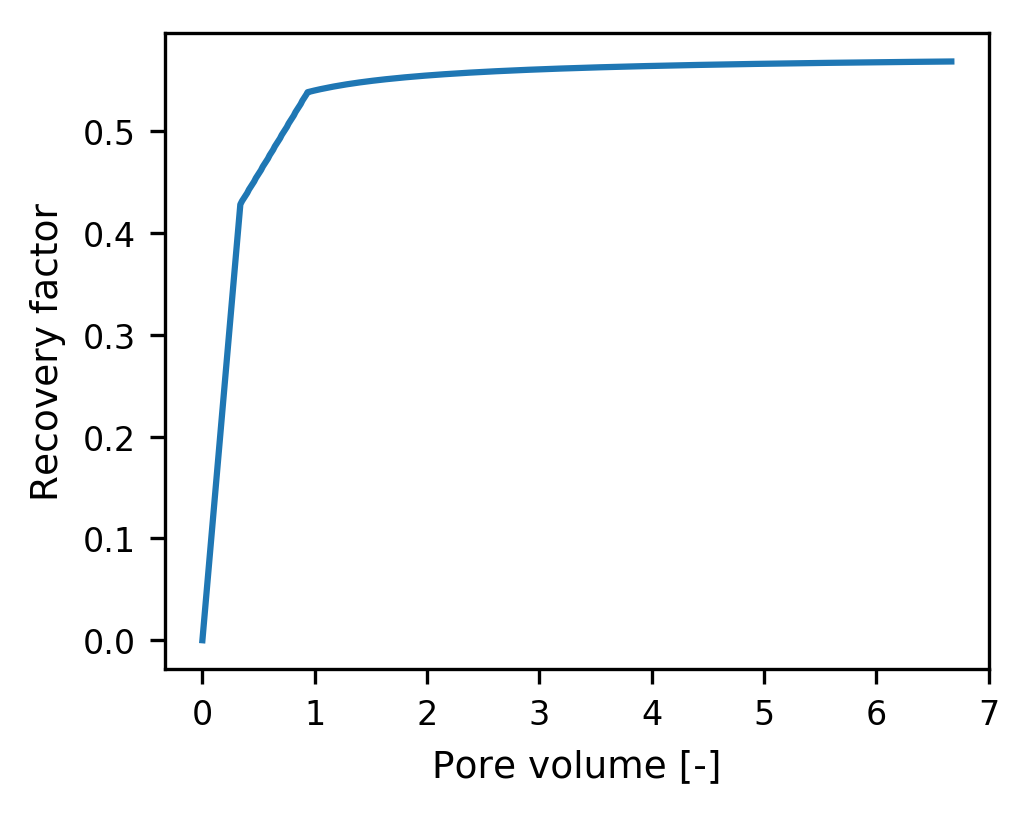

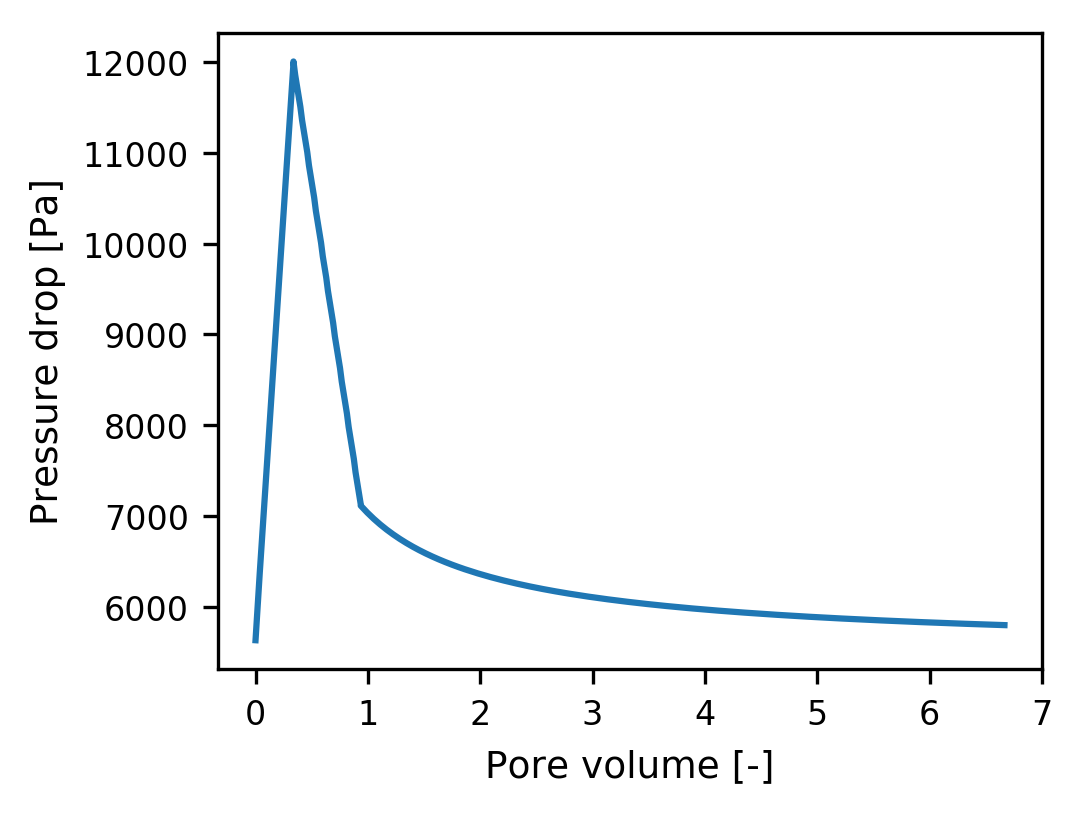

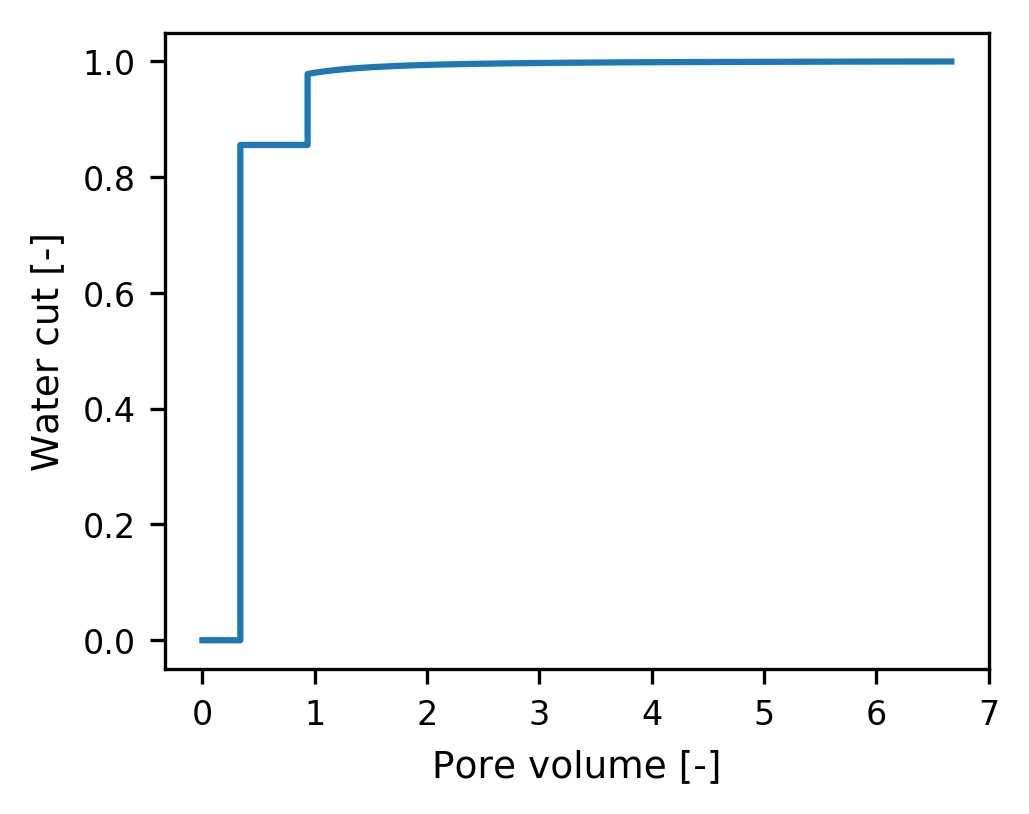

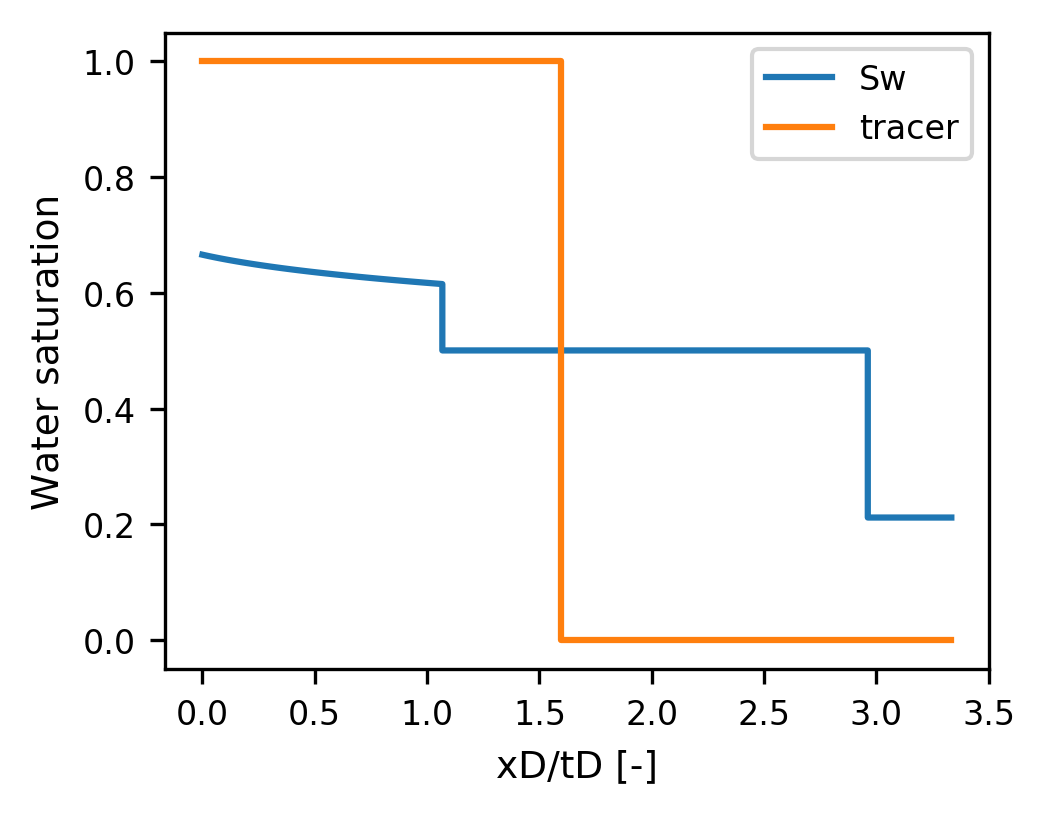

┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401
┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401


PyObject <matplotlib.legend.Legend object at 0x7fd316b50b00>

In [4]:
fluids_hs = FF.oil_water_fluids(mu_water=1.1e-3, mu_oil=2e-3)
fluids_ls = FF.oil_water_fluids(mu_water=1e-3, mu_oil=2e-3)
rel_perms_hs = FF.oil_water_rel_perms(krw0=krw0_ow, kro0=kro0_ow, 
        swc=swc_ow, sor=sor_ow, nw=nw_ow, no = no_ow)
rel_perms_ls = FF.oil_water_rel_perms(krw0=krw0_ww, kro0=kro0_ww, 
        swc=swc_ww, sor=sor_ww, nw=nw_ww, no = no_ww)
# rel_perms_hs = FF.oil_water_rel_perms(krw0=0.4, kro0=0.9, 
#         swc=0.15, sor=0.4, nw=2.0, no = 2.0)
# rel_perms_ls = FF.oil_water_rel_perms(krw0=0.35, kro0=0.95, 
#         swc=0.15, sor=0.35, nw=2.0, no = 2.0)
core_flood_fast = FF.core_flooding(u_inj=u_inj_fast, pv_inject=pv_inj_fast, p_back=1e5, sw_init=0.2, sw_inj=1.0, rel_perms=rel_perms_hs)
core_flood_slow = FF.core_flooding(u_inj=u_inj_slow, pv_inject=pv_inj_slow, p_back=1e5, sw_init=0.2, sw_inj=1.0, rel_perms=rel_perms_hs)

core_props = FF.core_properties()
ls_res_fast = FF.single_ion_adsorption_water_flood(core_props, fluids_ls, fluids_hs, rel_perms_hs, 
        rel_perms_ls, core_flood_fast, eq_const)
ls_res_slow = FF.single_ion_adsorption_water_flood(core_props, fluids_ls, fluids_hs, rel_perms_hs, 
        rel_perms_ls, core_flood_slow, eq_const)

FF.visualize(ls_res_fast)
FF.visualize(ls_res_slow)

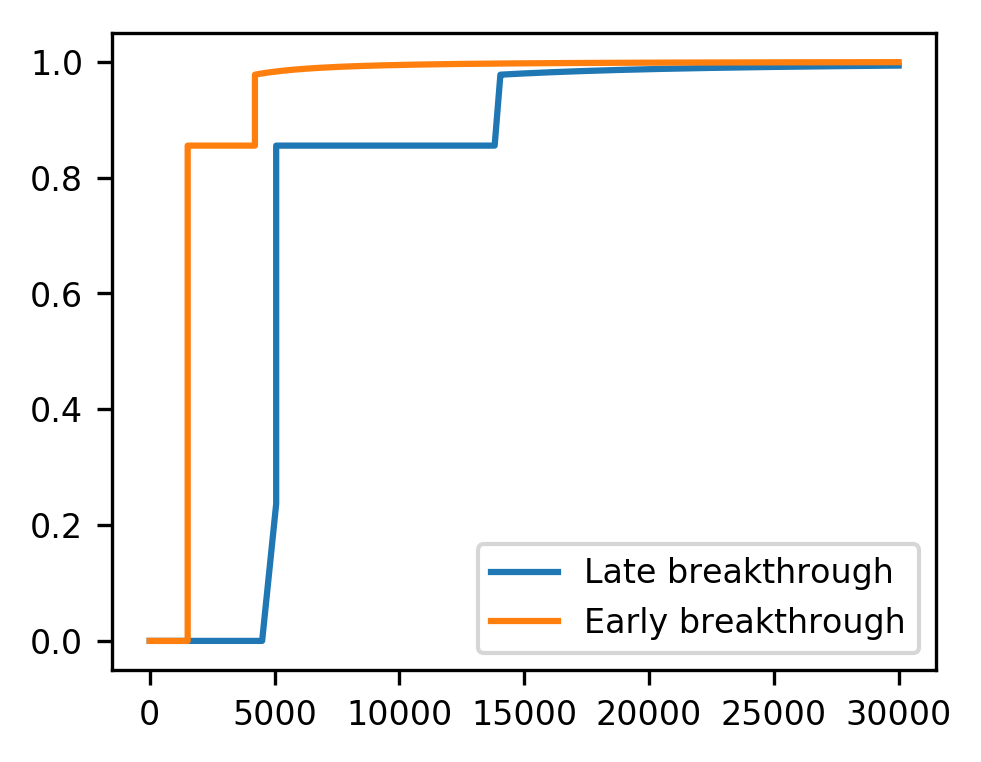

PyObject Text(0.5, 13.333333333333332, '')

In [5]:
plot(ls_res_fast.water_cut_time[:,1], ls_res_fast.water_cut_time[:,2], 
    ls_res_slow.water_cut_time[:,1], ls_res_slow.water_cut_time[:,2])
legend(["Late breakthrough", "Early breakthrough"])
xlabel("")

The above figure shows the water cut in each zone. I need to add them together based on the total flow rate in each zone and plot the final value versus time. I need to know the total injection rate, the total surface area of each zone, and the water cut versus time. Then I calculate the new water cut versus time by calculating the total flow of oil and normalizing it.

In [6]:
t_fast = ls_res_fast.water_cut_time[:,1]
WC_fast = ls_res_fast.water_cut_time[:,2]
t_slow = ls_res_slow.water_cut_time[:,1]
WC_slow = ls_res_slow.water_cut_time[:,2]
WC_f =  Spline1D(t_fast, WC_fast, k=1, bc="nearest")
WC_s =  Spline1D(t_slow, WC_slow, k=1, bc="nearest")

Spline1D(knots=[0.0,168.83 … 29739.5,30000.0] (150 elements), k=1, extrapolation="nearest", residual=0.0)

In [7]:
t = range(0, 25000, length=25000)
WC = (u_inj_fast*A_fast.*WC_f(t)+u_inj_slow*A_slow.*WC_s(t))./(u_inj_fast*A_fast+u_inj_slow*A_slow)

25000-element Array{Float64,1}:
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 ⋮                 
 0.9956037531347682
 0.9956040460799181
 0.9956043390250681
 0.995604631970218 
 0.9956049249153679
 0.9956052178605177
 0.9956055108056676
 0.9956058037508176
 0.9956060966959674
 0.9956063896411174
 0.9956066825862673
 0.9956069755314171

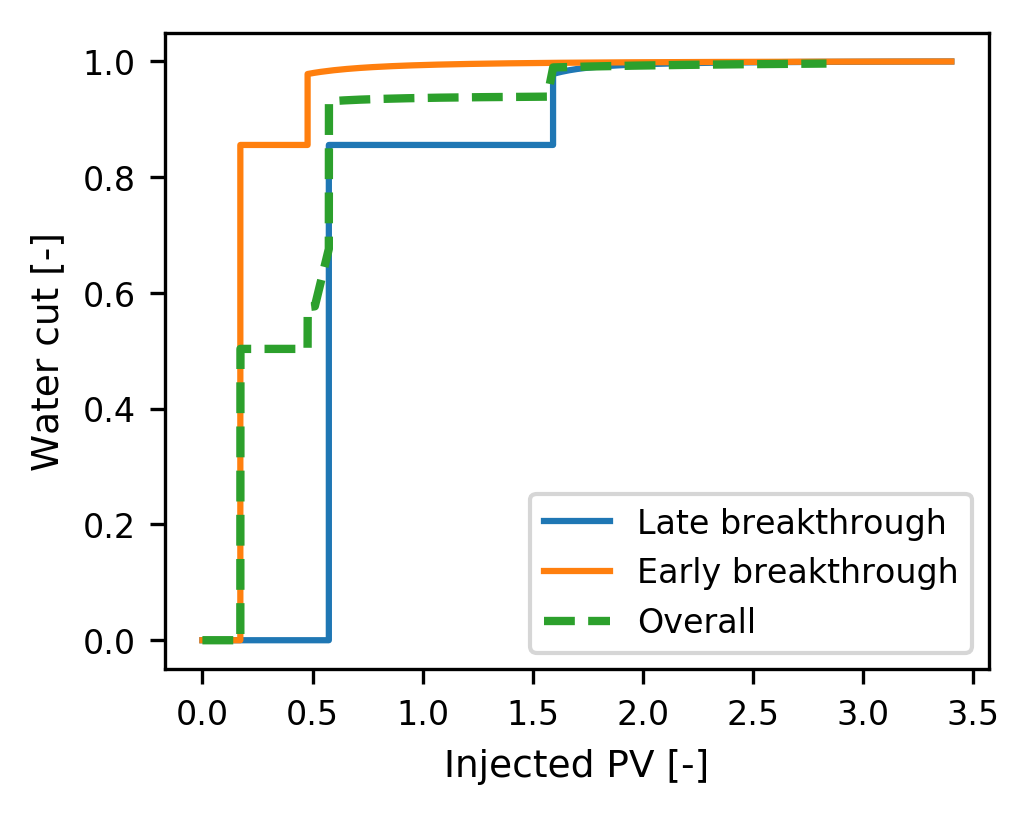

In [8]:
total_pv = pv_inj_fast*A_fast+pv_inj_slow*(1-A_fast)



plot(ls_res_fast.water_cut_time[:,1]./t_fast[end].*total_pv, ls_res_slow.water_cut_time[:,2],
#     ls_res_fast.water_cut_time[:,1]./t_fast[end].*total_pv, ls_res_fast.water_cut_time[:,2], 
    ls_res_slow.water_cut_time[:,1]./t_fast[end].*total_pv, ls_res_slow.water_cut_time[:,2])

plot(t./t_fast[end].*total_pv, WC, linewidth = 2, "--")

legend(["Late breakthrough", "Early breakthrough", "Overall"])

xlabel("Injected PV [-]")
ylabel("Water cut [-]")

savefig("results/water_cut_lowsal_zones.png")

In [9]:
t_fast[end], t_slow[end], total_pv

(29999.999999999996, 29999.999999999996, 3.4000000000000004)

In [10]:
ls_res_fast.water_cut_time[:,1][end], ls_res_slow.water_cut_time[:,1][end]

(29999.999999999996, 29999.999999999996)

## Solvent injection: DME example
One necessary detail is the volumetric partition coefficient that is needed for finding the analytical solution. It can be done by doing some thermodynamic magic for finding the partial molar volumes of DME in the aqueous and in the oleic phase.  
I've done it in another file, because it is boring for everybody else (not me, I love thermodynamics). The result is here. I have also shown the molar and mass partition coefficients

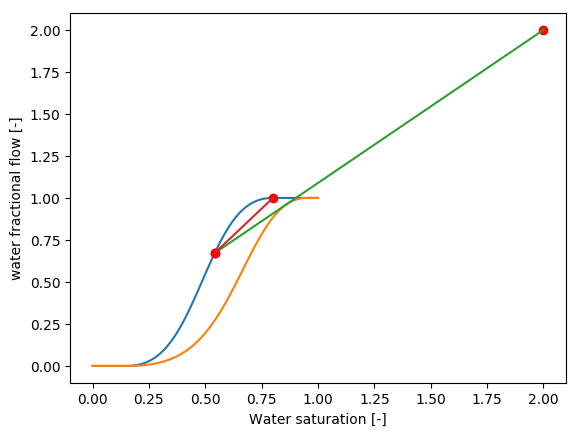

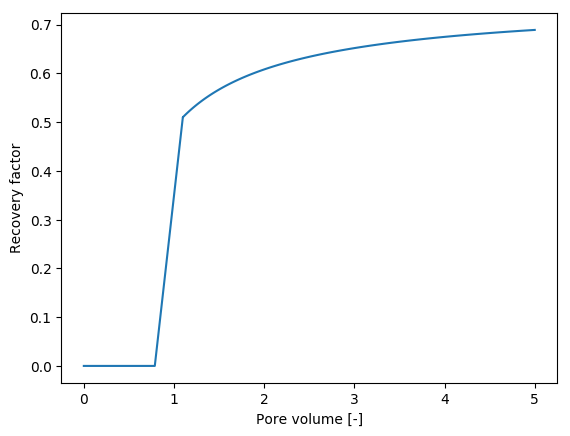

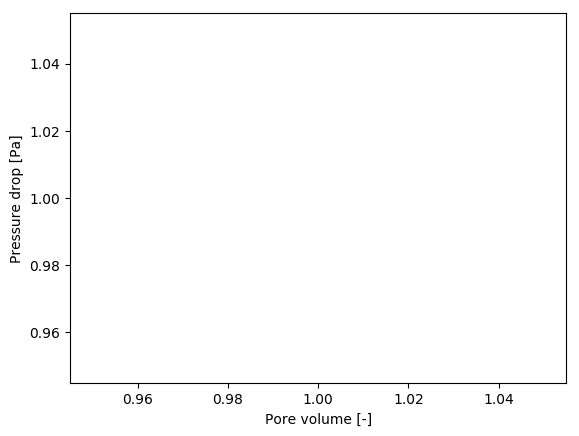

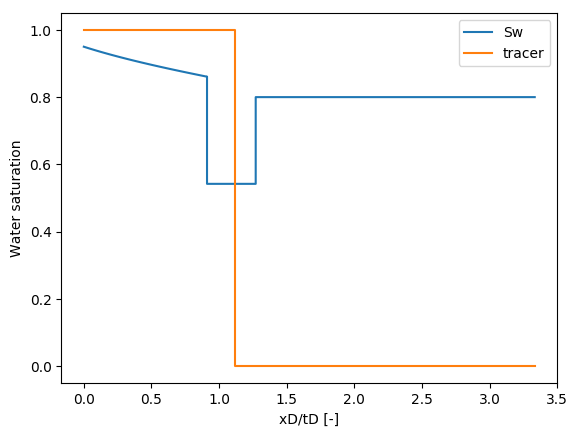

low sal sw_shock = 0.8608359516499842
low sal breakthrough time = 1.0980083098209574
high sal sw_shock = 0.5418926584207182
high sal breakthrough time = 0.7870168506036143


PyObject <matplotlib.legend.Legend object at 0x7f0873cf9ad0>

In [26]:
fluids_oil_water = FF.oil_water_fluids(mu_water=1e-3, mu_oil=2e-3)
fluids_solvent = FF.oil_water_fluids(mu_water=1.1e-3, mu_oil=1e-3)
rel_perms_oil_water = FF.oil_water_rel_perms(krw0=0.4, kro0=0.9, 
    swc=0.15, sor=0.2, nw=2.0, no = 2.0)
rel_perms_solvent = FF.oil_water_rel_perms(krw0=0.4, kro0=0.9, 
swc=0.15, sor=0.05, nw=2.0, no = 2.0)
core_flood = FF.core_flooding(sw_init = 1-0.2)
core_props = FF.core_properties()
K_eq = 2.0
sol_res = FF.water_soluble_solvent_flood(core_props, fluids_solvent, fluids_oil_water, 
    rel_perms_oil_water, rel_perms_solvent, core_flood, K_eq)
FF.visualize(sol_res)